In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np
import os

In [7]:
# Đường dẫn đến dữ liệu của bạn
data_dir = "D:/HK2-2024-25/Nhập môn Phân tích Dữ liệu và Học sâu/hinhanhcho/Dog Emotion"


In [8]:
# Các tham số cấu hình
img_width, img_height = 224, 224  # Kích thước ảnh đầu vào
batch_size = 32  # Kích thước batch
epochs = 25  # Số epoch huấn luyện

In [9]:
# Data augmentation và chuẩn bị dữ liệu
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa ảnh
    rotation_range=30,  # Quay ảnh ngẫu nhiên
    width_shift_range=0.2,  # Dịch chuyển theo chiều ngang
    height_shift_range=0.2,  # Dịch chuyển theo chiều dọc
    shear_range=0.2,  # Cắt góc
    zoom_range=0.2,  # Phóng to
    horizontal_flip=True,  # Lật ngang
    fill_mode='nearest',  # Cách điền các pixel bị thiếu
    validation_split=0.2  # Tạo phân tách cho validation
)


In [10]:
# Tải dữ liệu và chia thành training và validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', 
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary', 
    subset='validation'
)


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [11]:
# Xây dựng mô hình CNN sử dụng EfficientNetB0 làm base
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [12]:
# Chế độ fine-tuning
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.6)(x)  # Dropout để tránh overfitting
predictions = layers.Dense(1, activation='sigmoid')(x)

In [13]:
# Xây dựng mô hình cuối cùng
model = models.Model(inputs=base_model.input, outputs=predictions)

In [14]:
# Đóng băng các lớp trong EfficientNetB0 để không huấn luyện lại (chỉ fine-tune các lớp mới)
for layer in base_model.layers:
    layer.trainable = False

In [15]:
# Compile mô hình
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Đường dẫn đến bộ dữ liệu của bạn
data_dir = "D:/HK2-2024-25/Nhập môn Phân tích Dữ liệu và Học sâu/hinhanhcho/Dog Emotion"

# Các tham số cấu hình
img_width, img_height = 224, 224  # Kích thước ảnh đầu vào
batch_size = 32  # Kích thước batch
epochs = 25  # Số epoch huấn luyện

# Sử dụng ImageDataGenerator để phân loại và chuẩn hóa ảnh
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Chuẩn hóa ảnh
    rotation_range=30,  # Quay ảnh ngẫu nhiên
    width_shift_range=0.2,  # Dịch chuyển theo chiều ngang
    height_shift_range=0.2,  # Dịch chuyển theo chiều dọc
    shear_range=0.2,  # Cắt góc
    zoom_range=0.2,  # Phóng to
    horizontal_flip=True,  # Lật ngang
    fill_mode='nearest',  # Cách điền các pixel bị thiếu
)

# Tải dữ liệu và chia thành training và validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',  # Sử dụng 'categorical' vì chúng ta có nhiều lớp
)

# Xây dựng mô hình CNN với base là EfficientNetB0
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout để tránh overfitting
predictions = layers.Dense(4, activation='softmax')(x)  # 4 lớp (happy, sad, relaxed, angry)

# Xây dựng mô hình cuối cùng
model = models.Model(inputs=base_model.input, outputs=predictions)

# Đóng băng các lớp trong EfficientNetB0 để không huấn luyện lại (chỉ fine-tune các lớp mới)
for layer in base_model.layers:
    layer.trainable = False

# Compile mô hình
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy',  # Vì là phân loại đa lớp
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs
)

# Lưu mô hình
model.save('dog_emotion_model.h5')


Found 4000 images belonging to 4 classes.


c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 833ms/step - accuracy: 0.2608 - loss: 1.4090
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 543ms/step - accuracy: 0.2566 - loss: 1.3960
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 544ms/step - accuracy: 0.2561 - loss: 1.3918
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 68s 545ms/step - accuracy: 0.2374 - loss: 1.3913
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 613ms/step - accuracy: 0.2396 - loss: 1.3898
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 79s 632ms/step - accuracy: 0.2526 - loss: 1.3877
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 640ms/step - accuracy: 0.2591 - loss: 1.3871
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 78s 625ms/step - accuracy: 0.2394 - loss: 1.3875
Epoch 9/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 645ms/step - accuracy: 0.2561 - loss: 1.3860
Epoch 10/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 567ms/step - accuracy: 0.2458 - loss: 1.3865
Epoch 11/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 71s 567ms/step - accuracy: 0.2499 - loss: 1.3866
Epoch 12/25
125/12

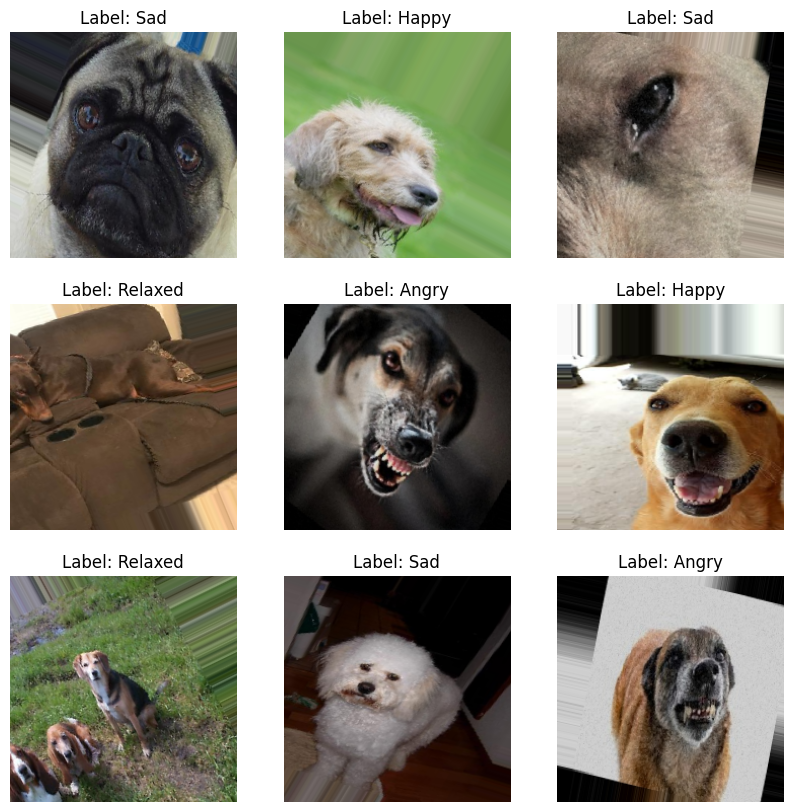

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Lấy một batch dữ liệu từ generator
batch_images, batch_labels = next(train_generator)

# Nhãn cảm xúc tương ứng với các lớp (theo thứ tự trong generator)
emotion_labels = ['Angry', 'Happy', 'Relaxed', 'Sad']

# Chọn một số hình ảnh trong batch và vẽ
plt.figure(figsize=(10, 10))
for i in range(9):  # Hiển thị 9 hình ảnh đầu tiên
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    
    # Lấy nhãn cảm xúc từ batch_labels (sử dụng class_indices để ánh xạ)
    label_index = np.argmax(batch_labels[i])  # Lấy nhãn cảm xúc với giá trị cao nhất
    plt.title(f"Label: {emotion_labels[label_index]}")  # In nhãn cảm xúc tương ứng
    plt.axis('off')

plt.show()


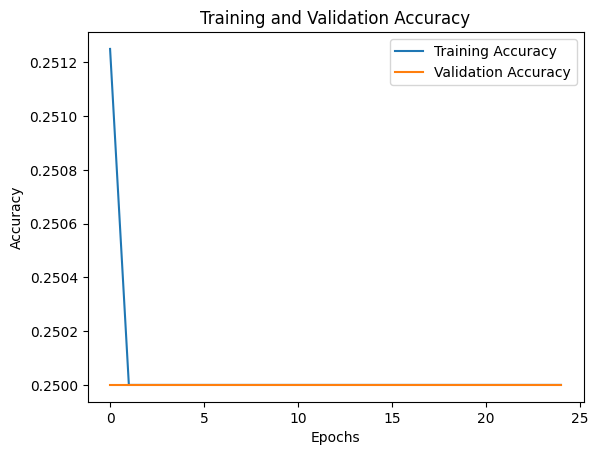

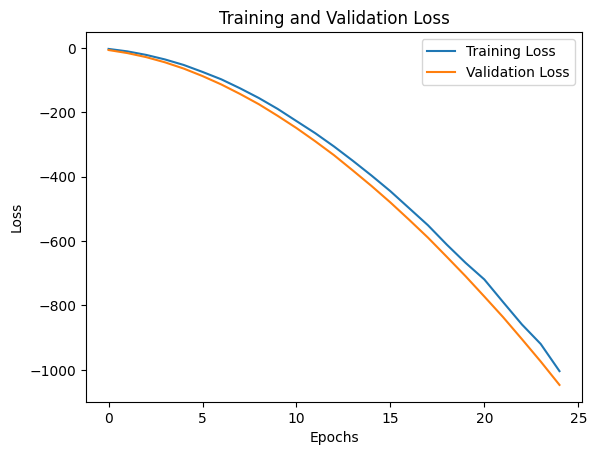

In [21]:
# Vẽ đồ thị quá trình huấn luyện
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# Đánh giá mô hình trên dữ liệu validation
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 563ms/step - accuracy: 0.2640 - loss: -1031.8202
Validation Loss: -1046.7152099609375
Validation Accuracy: 0.25


In [23]:
# Dự đoán trên dữ liệu validation
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).flatten()

25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 594ms/step


In [24]:
# In ra báo cáo phân loại
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.25      1.00      0.40       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800



c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

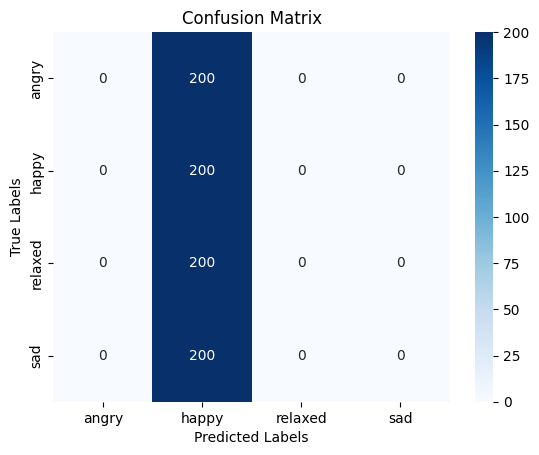

In [25]:
# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [38]:
# Kiểm tra các lớp trong thư mục dữ liệu
print(train_generator.class_indices)


{'angry': 0, 'happy': 1, 'relaxed': 2, 'sad': 3}


In [29]:
# Kiểm tra kết quả huấn luyện và validation
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")


Training Accuracy: 0.25
Validation Accuracy: 0.25


25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 593ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.25      1.00      0.40       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800



c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\TUF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

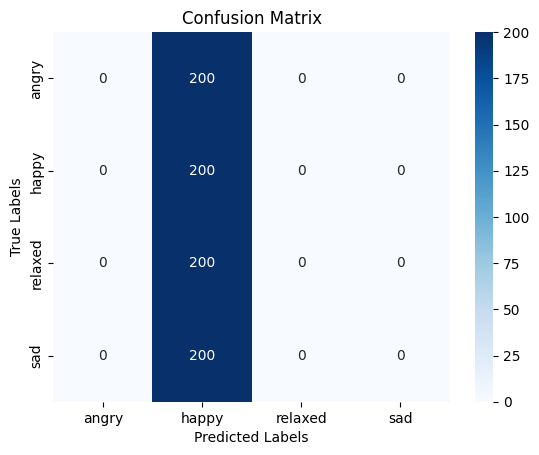

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Dự đoán trên dữ liệu validation
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred).flatten()

# Báo cáo phân loại
print(classification_report(y_true, y_pred))

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=validation_generator.class_indices, yticklabels=validation_generator.class_indices)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
